<a href="https://colab.research.google.com/github/sweetyjunnarkar/EMAIL-CAMPAIGN-EFFECTIVENESS-PREDICTION/blob/main/Sweety_Junnarkar_Capstone_Project_EmailEffectivenessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMAIL CAMPAIGN EFFECTIVENESS PREDICTION**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

Email_ID - This column contains the email ids of individuals.

Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.

Subject_Hotness_Score - It is the email effectiveness score.

Email_Source - It reepresents the source of the email like sales or marketing or product type email.

Email_Campaign_Type - Campaign type

Total_Past_Communications - This column contains the previous mails from the same source.

Time_Email_sent_Category - It has 3 categories 1,2 and 3 which may be gives us morning,evening and night time slot.

Word_Count - It contains the no.of words contained in the mail.

Total_Links - Total links from the mail.

Total_Images - The banner images from the promotional email.

Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Project-1/data_email_campaign.csv")

In [3]:
df.head(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [5]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


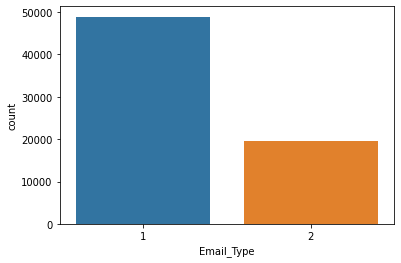

In [6]:
sns.countplot(df["Email_Type"])

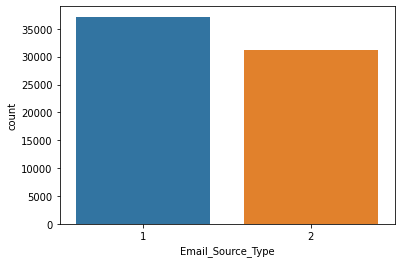

In [7]:
sns.countplot(df["Email_Source_Type"])

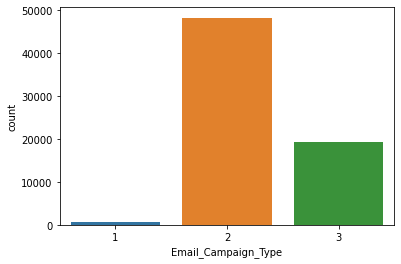

In [8]:
sns.countplot(df["Email_Campaign_Type"])

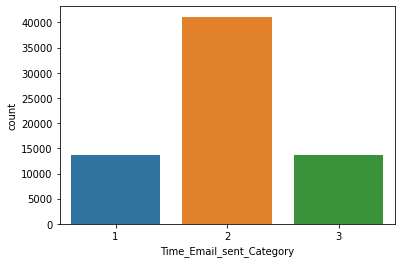

In [9]:
sns.countplot(df["Time_Email_sent_Category"])

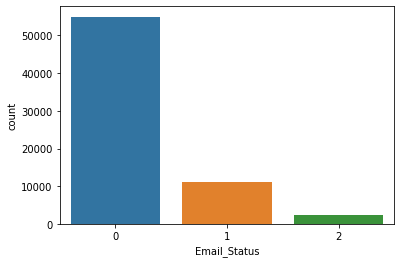

In [10]:
sns.countplot(df['Email_Status'])

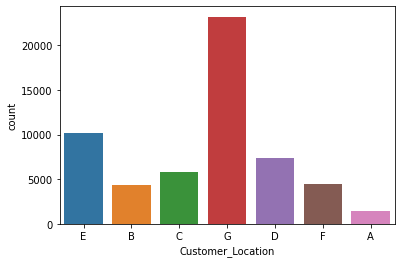

In [11]:
sns.countplot(df["Customer_Location"])

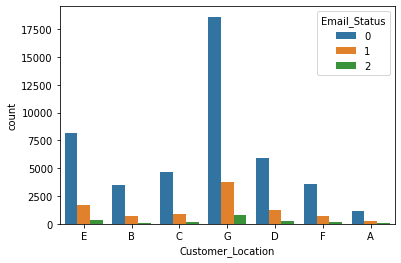

In [12]:
sns.countplot(x='Customer_Location',hue='Email_Status',data=df)

In [13]:
df=df.drop(['Customer_Location','Email_ID'],axis=1)

In [14]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,3,18.0,2,947,4.0,0.0,0


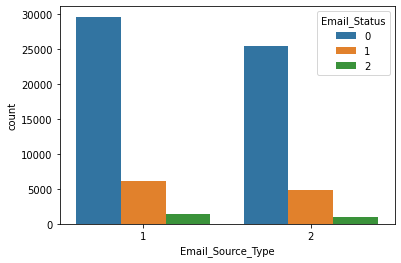

In [15]:
sns.countplot(x='Email_Source_Type',hue='Email_Status',data=df)

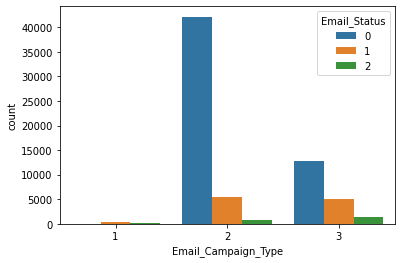

In [16]:
sns.countplot(x='Email_Campaign_Type',hue='Email_Status',data=df)

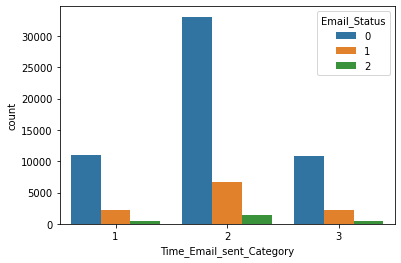

In [17]:
sns.countplot(x='Time_Email_sent_Category',hue='Email_Status',data=df)

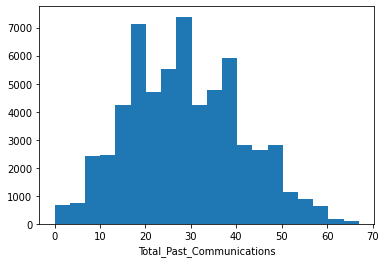

In [18]:
sns.distplot(df['Total_Past_Communications'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1})

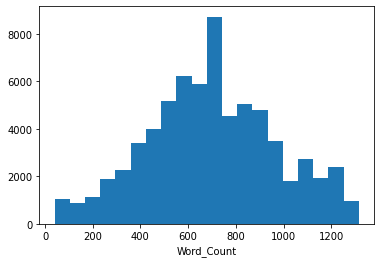

In [19]:
sns.distplot(df['Word_Count'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1})

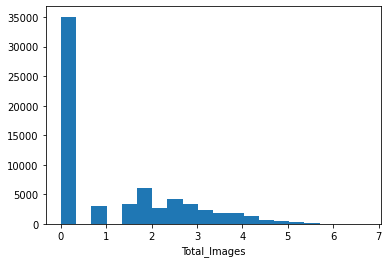

In [20]:
sns.distplot(np.sqrt(df['Total_Images']),norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1})

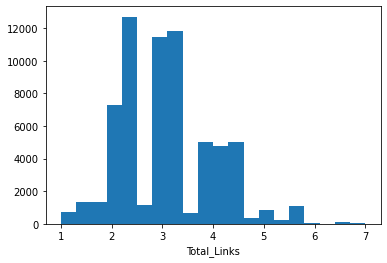

In [21]:
sns.distplot(np.sqrt(df['Total_Links']), norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1})

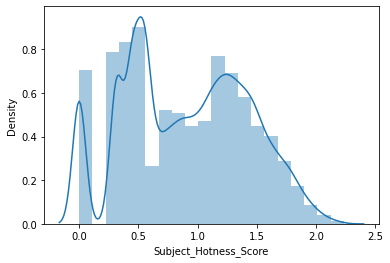

In [22]:
sns.distplot(np.sqrt(df['Subject_Hotness_Score']), norm_hist=False, bins=20)

In [23]:
df['Total_Links'] = df['Total_Links'].fillna(df['Total_Links'].mode()[0])

In [24]:
df['Total_Past_Communications'] = df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mode()[0])

In [25]:
df['Total_Images'] = df['Total_Images'].fillna(df['Total_Images'].mode()[0])

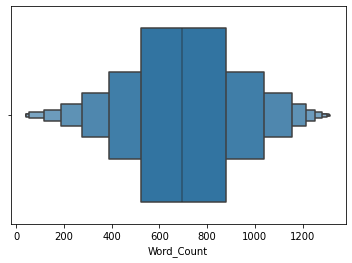

In [26]:
sns.boxenplot(df['Word_Count'])

In [27]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[["Email_Type", "Email_Source_Type", "Email_Campaign_Type", "Time_Email_sent_Category" ]], df['Email_Status'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ["Email_Type", "Email_Source_Type", "Email_Campaign_Type", "Time_Email_sent_Category"])
df_oversampler
# sns.countplot(df_oversampler['Email_Status'])

,Email_Type,Email_Source_Type,Email_Campaign_Type,Time_Email_sent_Category
0,1,2,2,1
1,2,1,2,2
2,2,1,3,2
3,1,2,2,2
4,1,2,3,2
...,...,...,...,...
164818,2,1,3,2
164819,2,1,3,3
164820,1,1,2,2
164821,1,1,3,1


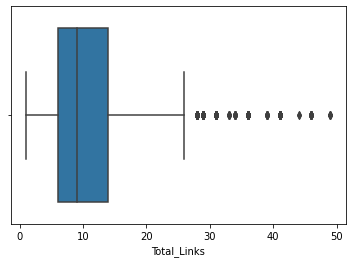

In [28]:
sns.boxplot(df['Total_Links'])

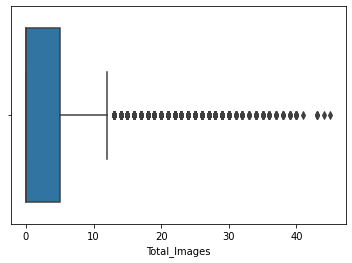

In [29]:
sns.boxplot(df['Total_Images'])

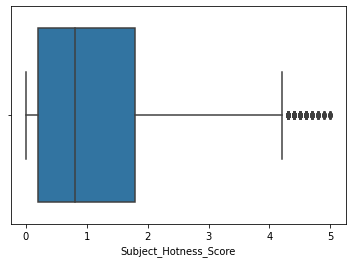

In [30]:
sns.boxplot(df['Subject_Hotness_Score'])

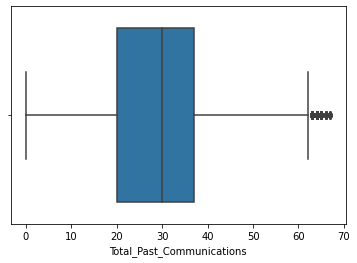

In [31]:
sns.boxplot(df['Total_Past_Communications'])

In [32]:
import scipy.stats as stats

In [33]:
z_scores = stats.zscore(df[["Subject_Hotness_Score","Total_Past_Communications","Word_Count","Total_Links"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.85).all(axis=1)
new_df = df[filtered_entries]

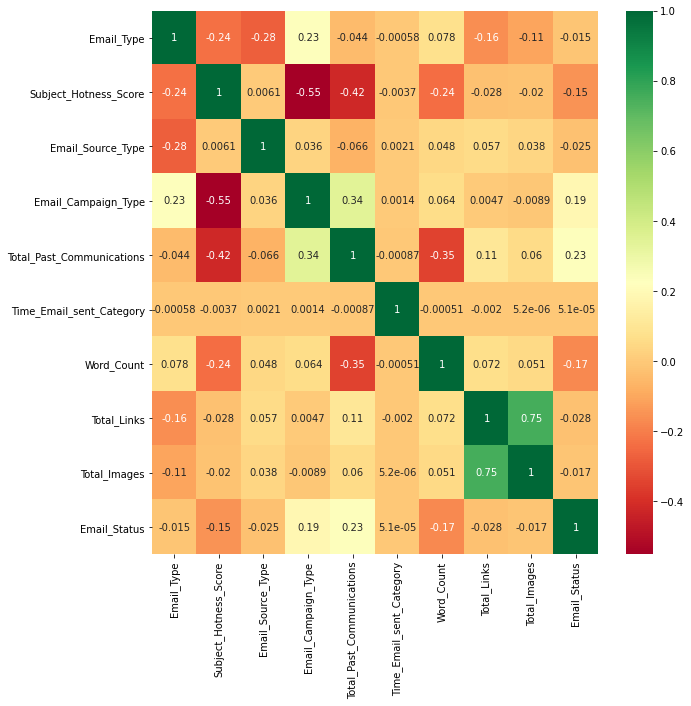

In [34]:
import seaborn as sc

X = df.iloc[:,1:7]
Y = df.iloc[:,-1]

corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))

g= sc.heatmap(df[top_corr_features].corr(),annot = True,cmap ="RdYlGn")

X_val = df.iloc[:,1:7]
Y_val = df.iloc[:,-1]
Y_val = Y_val.astype('int')

In [35]:
df['links&images']=df['Total_Links']+df['Total_Images']

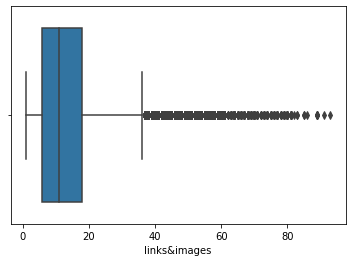

In [36]:
sns.boxplot(df['links&images'])

In [37]:
df =df.drop(['Total_Images'], axis = 1)

In [38]:
df.shape

(68353, 10)

In [39]:
df =df.drop(['links&images'], axis = 1)

In [40]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links',
       'Email_Status'],
      dtype='object')

In [41]:
print("counts of label '0' Before OverSampling : {} \n".format(sum(df['Email_Status'] == 0)))
print("counts of label '1' Before OverSampling : {} \n".format(sum(df['Email_Status'] == 1)))
print("counts of label '2' Before OverSampling : {} \n".format(sum(df['Email_Status'] == 2)))

counts of label '0' Before OverSampling : 54941 

counts of label '1' Before OverSampling : 11039 

counts of label '2' Before OverSampling : 2373 



In [42]:
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE

# fit predictor and target variable
sm = SMOTE(random_state = 2)
x_smote, y_smote = sm.fit_resample(df.iloc[:,0:-1], df['Email_Status'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 68353
Resampled dataset shape 164823


In [43]:
print('the shape of x_smote after OverSampling, : {}'.format(x_smote.shape))
print('the shape of y_smote after OverSampling, : {} \n'.format(y_smote.shape))
print("counts of label '0', after OverSampling, : {}".format(sum(y_smote == 0)))
print("counts of label '1', after OverSampling, : {}".format(sum(y_smote == 1)))
print("counts of label '2', after OverSampling, : {}".format(sum(y_smote == 2)))

the shape of x_smote after OverSampling, : (164823, 8)
the shape of y_smote after OverSampling, : (164823,) 

counts of label '0', after OverSampling, : 54941
counts of label '1', after OverSampling, : 54941
counts of label '2', after OverSampling, : 54941


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(Y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,Y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,Y_test))

Training accuracy Score    :  0.4922492378164389
Validation accuracy Score :  0.4883664492643713
              precision    recall  f1-score   support

           0       0.59      0.54      0.57     11892
           1       0.23      0.43      0.30      5894
           2       0.64      0.47      0.54     15179

    accuracy                           0.49     32965
   macro avg       0.49      0.48      0.47     32965
weighted avg       0.55      0.49      0.51     32965



In [48]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 67.3MB 60kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [49]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [50]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, Y_train,  
        eval_set=(X_test, Y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [51]:
catboost_prediction = clf2.predict(X_test)
catboost_accuracy = accuracy_score(Y_test,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,Y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,Y_test))

Training accuracy Score    :  0.8301657844044351
Validation accuracy Score :  0.8098286060973761
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     12822
           1       0.62      0.80      0.70      8509
           2       0.85      0.80      0.82     11634

    accuracy                           0.81     32965
   macro avg       0.81      0.81      0.80     32965
weighted avg       0.83      0.81      0.82     32965



In [52]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, Y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(Y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,Y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,Y_test))

Training accuracy Score    :  0.7031882782993827
Validation accuracy Score :  0.698771424237828
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     13137
           1       0.42      0.64      0.51      7185
           2       0.75      0.65      0.70     12643

    accuracy                           0.70     32965
   macro avg       0.70      0.69      0.68     32965
weighted avg       0.75      0.70      0.71     32965



In [53]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'XGBoost','CatBoost'],
    'Test accuracy': [logreg_accuracy, 
               xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
2,CatBoost,0.809829
1,XGBoost,0.698771
0,Logistic Regression,0.488366
